In [19]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [20]:
# 1 -> pneumonia
# 0 -> normal
def read_data(set):
    path = "/content/drive/MyDrive/Colab Notebooks/covid_xray_classification/images/{}/".format(set)
    p_images = os.listdir(path + 'PNEUMONIA')
    n_images = os.listdir(path + 'NORMAL')

    p_X = [np.sum(cv2.resize(cv2.imread(path + "PNEUMONIA/{}".format(image)), (100,100)), axis=2) for image in p_images]
    n_X = [np.sum(cv2.resize(cv2.imread(path + "NORMAL/{}".format(image)), (100,100)), axis=2) for image in n_images]
    X = np.array(p_X + n_X)

    p_y = np.full(len(p_X), 1)
    n_y = np.full(len(n_X), 0)
    y = np.append(p_y, n_y)

    inds = np.arange(X.shape[0])
    np.random.shuffle(inds)

    X = X[inds]
    y = y[inds]
    return X, y

In [21]:
x_train, y_train = read_data('train')
x_val, y_val = read_data('test')

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(420, activation="relu"),
    tf.keras.layers.Dense(210, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="tanh"),
    tf.keras.layers.Dense(2)                                                 
])

In [23]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=.003),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7186 - accuracy: 0.5614
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1016 - accuracy: 0.4874
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7785 - accuracy: 0.4636
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7712 - accuracy: 0.4290
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8820 - accuracy: 0.5110
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9017 - accuracy: 0.5081
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8113 - accuracy: 0.5169
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7059 - accuracy: 0.5299
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5213
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7671 - accuracy: 0.3869
Epoch 11/100
5/5 [===========

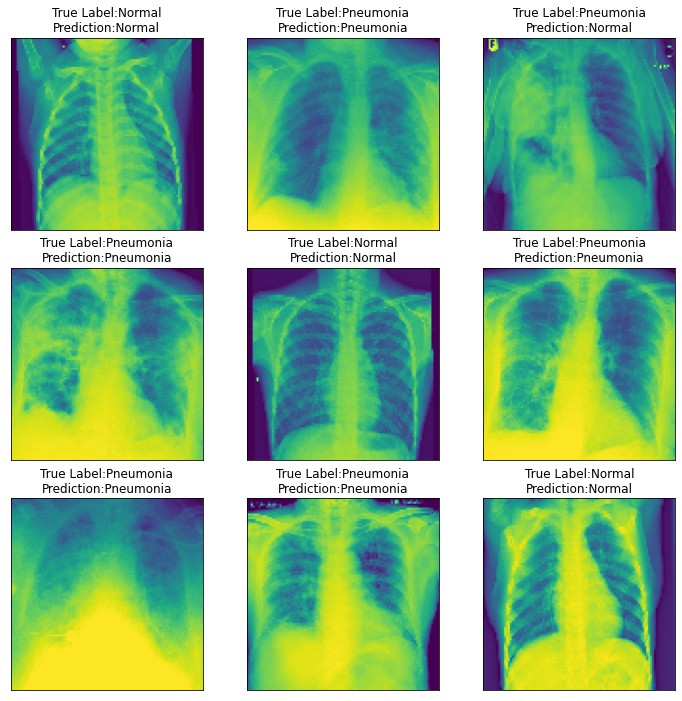

In [24]:
class_labels = ["Normal", "Pneumonia"]
plt.figure(figsize=(12, 12))
for i in range(9):
    pred = model.predict(x_val[i].reshape(-1, 100, 100)).tolist()[0]
    pred = pred.index(max(pred))
    pred = class_labels[pred]
    true = class_labels[y_val[i]]
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i])
    plt.xticks([])
    plt.yticks([])
    plt.title("True Label:{}\nPrediction:{}".format(true, pred))

In [25]:
loss, acc = model.evaluate(x_val, y_val) 
print("Validation Loss: {}".format(loss))
print("Validation Accuracy: {}".format(acc))

2/2 [==============================] - 0s 6ms/step - loss: 0.0644 - accuracy: 0.9750
Validation Loss: 0.06440548598766327
Validation Accuracy: 0.9750000238418579
